In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
file_path = r"C:\Users\pg114931\Downloads\EnterpriseDNA\Workouts\US_Accidents_Dec21_updated.csv"

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.shape

(2845342, 47)

In [6]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"].str.split(".",expand=True)[0])
df["End_Time"] = pd.to_datetime(df["End_Time"].str.split(".",expand=True)[0])

### 1. Is there any missing data? If so, visualize it in a plot.

In [8]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

### 2. Remove any columns that you may find not useful for your analysis.

In [9]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,Fa

### 3. Plot the top 10 cities with the most accidents.

In [10]:
top_ten_cities = df.groupby(["City"]).agg(Count=("ID", "count")).sort_values(by="Count",ascending=False).head(10)
top_ten_cities.index

Index(['Miami', 'Los Angeles', 'Orlando', 'Dallas', 'Houston', 'Charlotte',
       'Sacramento', 'San Diego', 'Raleigh', 'Minneapolis'],
      dtype='object', name='City')

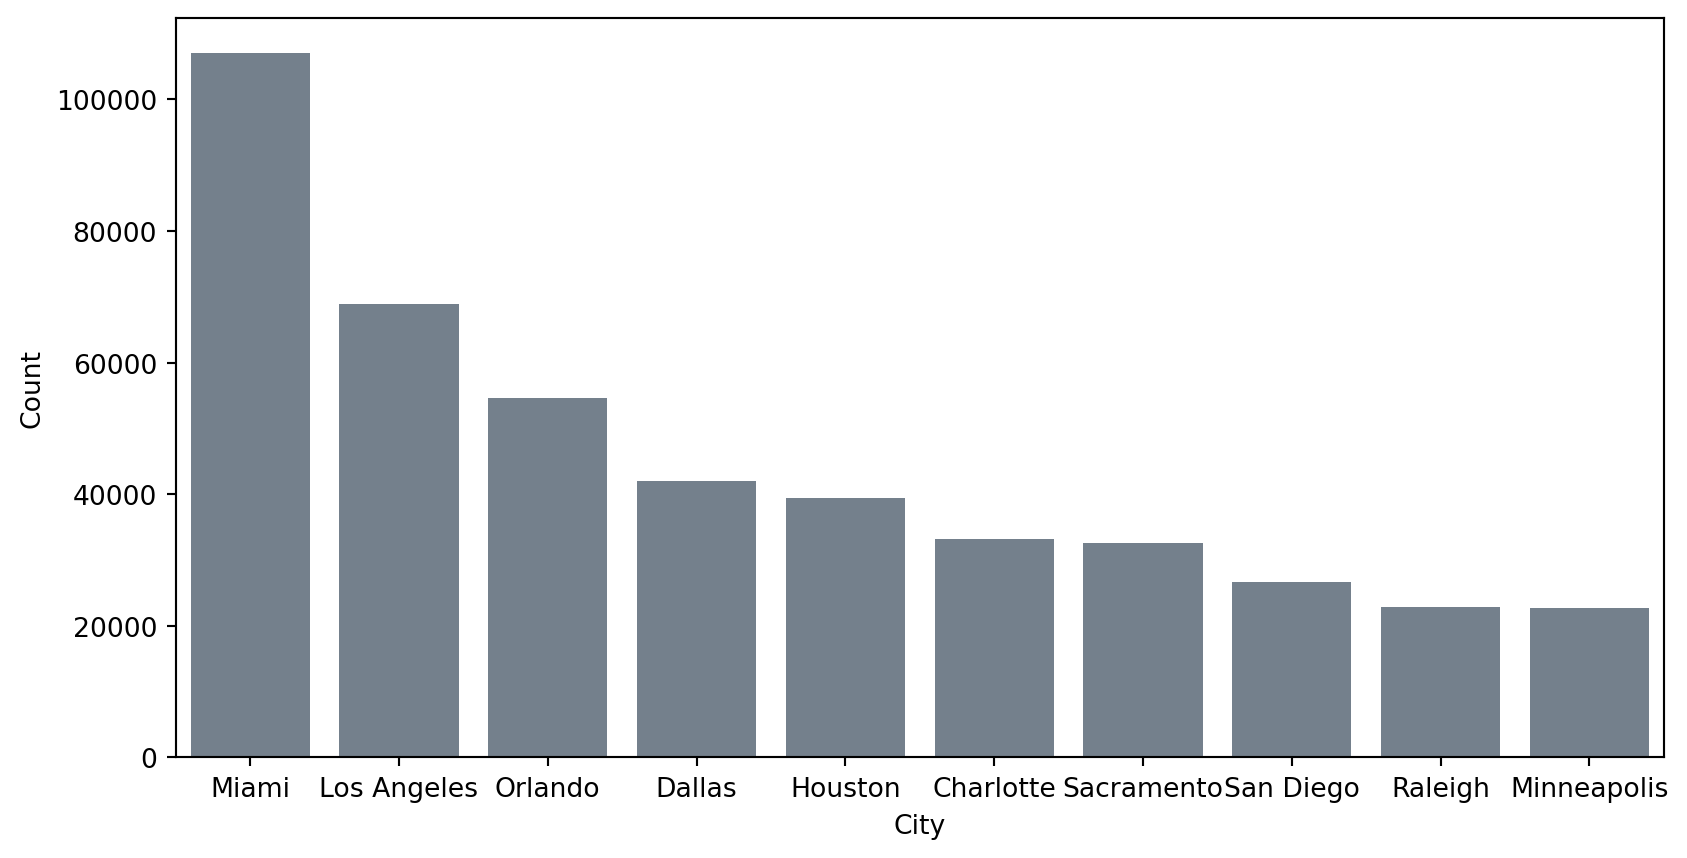

In [11]:
#| label: fig-bar
#| fig-cap: "Top 10 cities with the most accidents"

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data=top_ten_cities, x=top_ten_cities.index, y="Count", color='slategray')

plt.show()

### 4. Plot the distribution of the start time.

In [12]:
start_time_distribution = df["Start_Time"].value_counts().reset_index()
start_time_year = df["Start_Time"].dt.to_period('y').value_counts().reset_index()

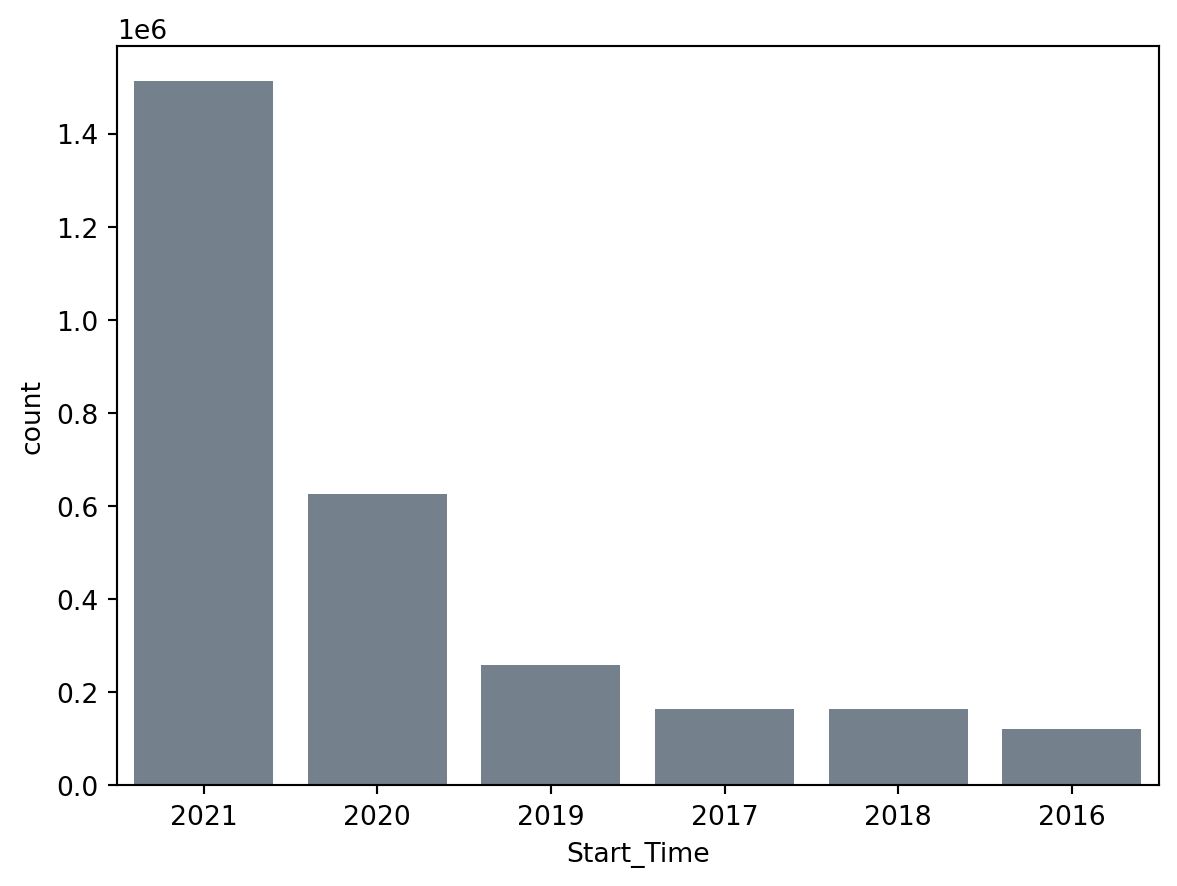

In [13]:
#| label: fig-bar-start_time
#| fig-cap: "Distribution of the start time by years"
sns.barplot(x="Start_Time",y="count", data=start_time_year, color='slategray')
plt.show()

### 5. Is the distribution of accidents by hour the same on weekends as on weekdays?

In [14]:
start_time = df["Start_Time"].to_frame()
start_time["Is_Weekday"] = np.where(start_time["Start_Time"].dt.weekday < 5,True, False) 
start_time["Start_Time"] = start_time["Start_Time"].dt.hour

weekday = start_time[start_time["Is_Weekday"] == True ].value_counts().reset_index()
weekend = start_time[start_time["Is_Weekday"] == False].value_counts().reset_index()


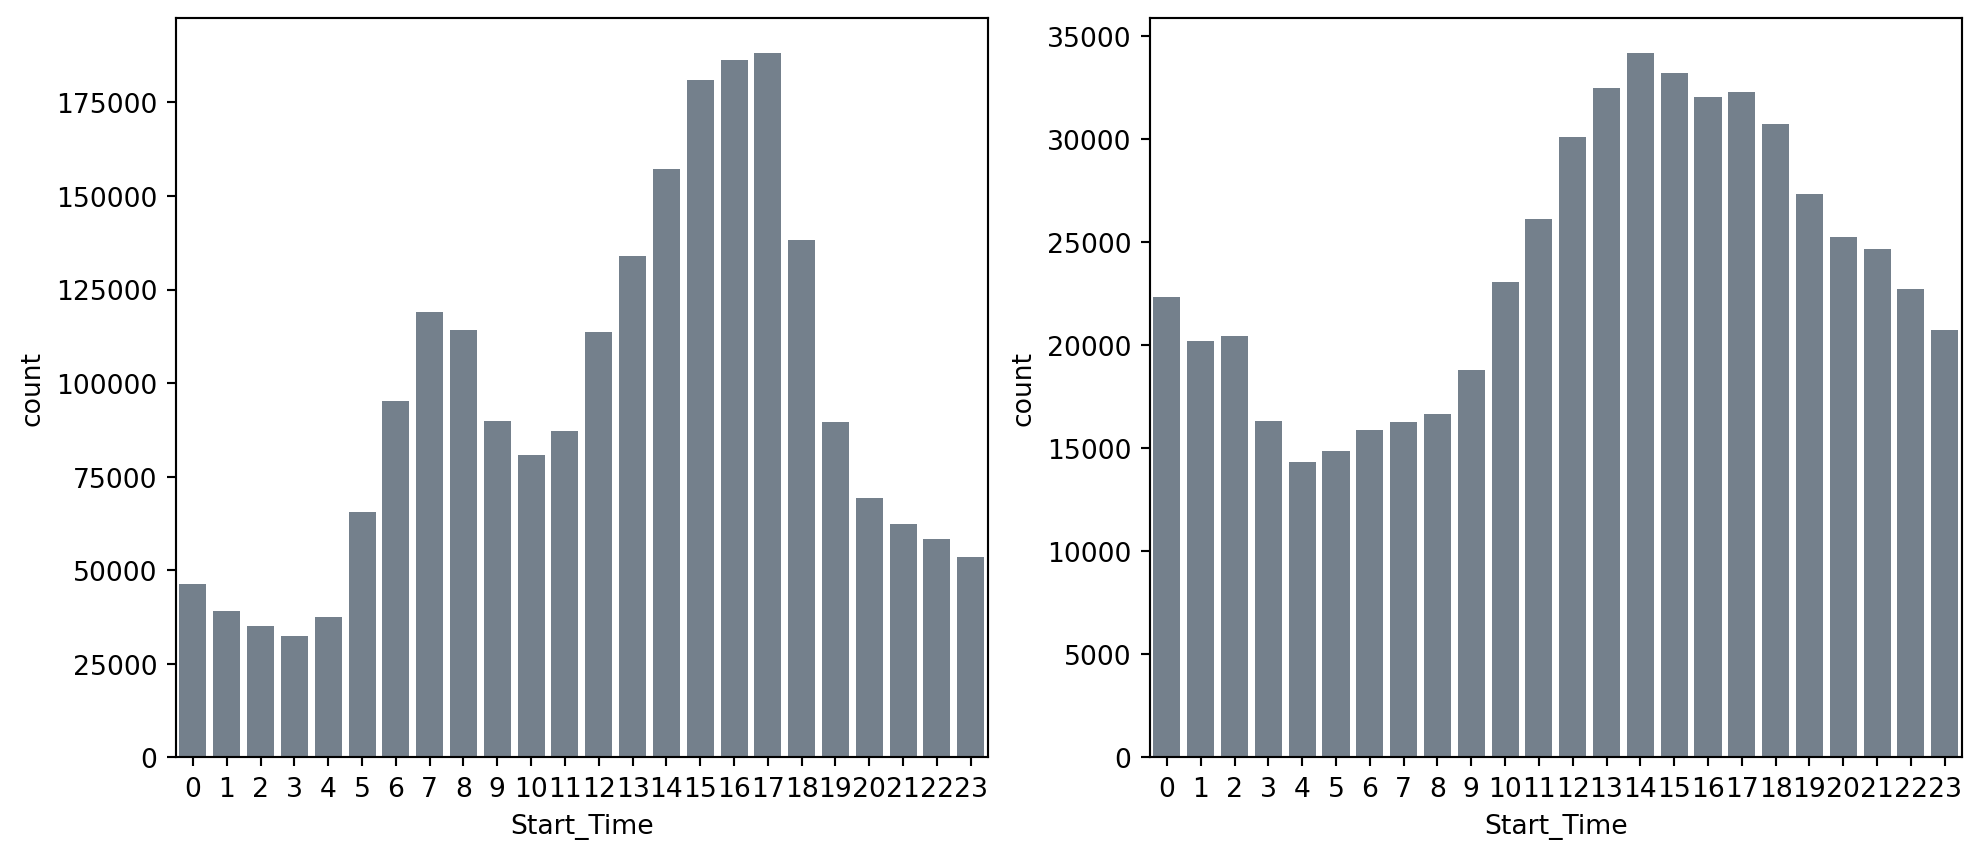

In [15]:
#| label: fig-bar-weekdays-weekend
#| fig-cap: "Distribution of the start time by weekdays and weekend"
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(12, 5))

sns.barplot(ax=ax[0], x=weekday["Start_Time"], y=weekday["count"] , color='slategray')
sns.barplot(ax=ax[1], x=weekend["Start_Time"], y=weekend["count"] , color='slategray')
plt.show()

### 6. What is the distribution of start time on Sundays?

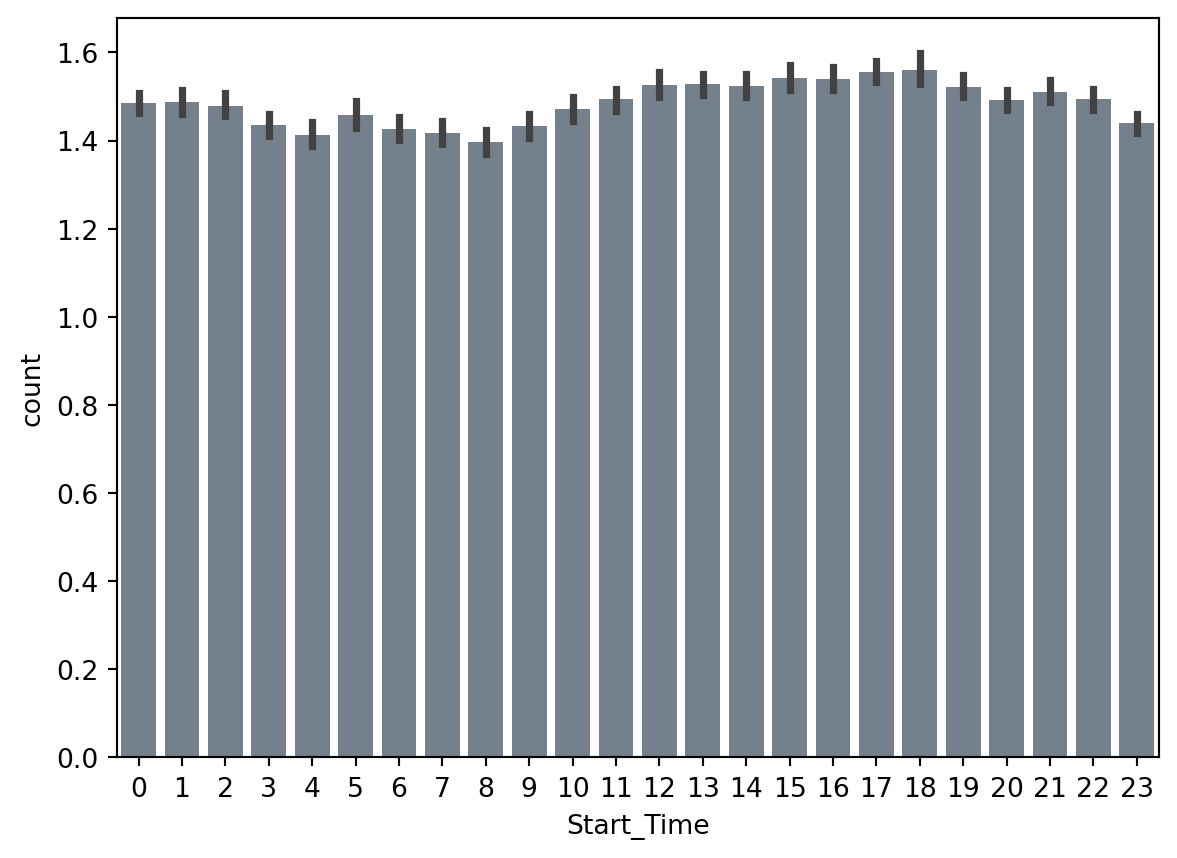

In [16]:
#| label: fig-bar-start_time-sundays
#| fig-cap: "Distribution of the start time on sundays"
sunday_distribution = df["Start_Time"].to_frame()
sunday_distribution = sunday_distribution[sunday_distribution["Start_Time"].dt.weekday == 6].value_counts().reset_index()
sunday_distribution["Start_Time"] = sunday_distribution["Start_Time"].dt.hour
sns.barplot(x="Start_Time",y="count", data=sunday_distribution, color='slategray')
plt.show()


### 7. Create a geographical plot to show accidents across a map of the United States.

In [17]:
df_states =df.groupby(["State"]).agg(Count=("ID", "count")).reset_index()

In [18]:
geo_data = df[['State','Start_Lat', 'Start_Lng','End_Lat','End_Lng']].drop_duplicates()

In [19]:
#| label: fig-geeplot
#| fig-cap: "Geographical plot of accidents accross United States"

#fig = px.scatter_geo(geo_data, lat='Start_Lat', lon='Start_Lng', #color='mag',
#                     #hover_name='place', #size='mag',
#                     title='Accidents across United States')
fig = px.choropleth(
    df_states, 
    locations="State", 
    locationmode="USA-states", 
    color="Count", 
    scope="usa", 
    color_continuous_scale="blues"
)

fig.show()

### 8. Among the top 100 cities in number of accidents, which states do they belong to most frequently?

In [20]:
city_count = df.groupby(["City", "State"], as_index=False)["ID"].count().sort_values(by="ID",ascending=False).head(100)
city_count["State"].value_counts().reset_index()

,State,count
0,CA,30
1,FL,17
2,TX,5
3,NY,4
4,VA,3
5,OH,3
6,MI,3
7,PA,3
8,MO,3
9,OR,3


### 9. Which months have the most accidents?

In [21]:
month_values = df["Start_Time"].dt.month_name()
month_values.value_counts(ascending=False).reset_index(name="No_of_Accidents")

,Start_Time,No_of_Accidents
0,December,473943
1,November,360696
2,October,299131
3,September,241822
4,June,226561
5,January,198365
6,February,194995
7,May,181944
8,August,178670
9,April,171880


### 10. What is the trend of accidents year over year (decreasing/increasing?)

In [22]:
year_values = df["Start_Time"].dt.year.value_counts().reset_index(name="YoY").sort_values(by="Start_Time",ascending=True)

year_values.pct_change()

,Start_Time,YoY
5,NaN,NaN
3,0.000496,0.343326
4,0.000496,-0.004527
2,0.000496,0.584884
1,0.000495,1.420061
0,0.000495,1.415453


### 11. Is the state of New York in the data?

In [23]:
df[df["State"] == "NY"]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
31580,A-31581,2,2016-11-30 15:58:59,2016-11-30 21:58:59,40.850020,-73.943990,40.853290,-73.960640,0.899,Between Amsterdam Ave/Harlem River Dr and Huds...,NaN,George Washington Brg,R,New York,New York,NY,10033,US,US/Eastern,KNYC,2016-11-30 15:51:00,53.1,NaN,93.0,29.80,2.0,East,6.9,0.09,Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
31607,A-31608,2,2016-11-30 17:13:53,2016-11-30 23:13:53,41.311771,-74.121299,41.129970,-74.167730,12.791,Between RT-17/Toll Plaza/Exit 16 and RT-17/RT-...,NaN,I-87 S,R,Central Valley,Orange,NY,10917,US,US/Eastern,KSWF,2016-11-30 16:45:00,51.8,NaN,100.0,29.82,3.0,East,13.8,NaN,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
31609,A-31610,2,2016-11-30 17:12:20,2016-11-30 23:12:20,43.039261,-76.142130,43.042730,-76.142440,0.240,At Adams St/Exit 18 - Accident.,NaN,I-81 S,R,Syracuse,Onondaga,NY,13210,US,US/Eastern,KSYR,2016-11-30 16:54:00,53.1,NaN,80.0,29.63,10.0,ESE,10.4,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
31625,A-31626,2,2016-11-30 17:31:55,2016-11-30 23:31:55,40.771460,-73.946580,40.768780,-73.949060,0.226,At 79th St - Accident.,NaN,FDR Dr S,R,New York,New York,NY,10028,US,US/Eastern,KNYC,2016-11-30 17:33:00,53.1,NaN,93.0,29.81,2.5,East,3.5,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
31626,A-31627,2,2016-11-30 17:31:55,2016-11-30 23:31:55,40.698450,-73.983030,40.699460,-73.984150,0.091,At Manhattan BR/Exit 29A - Accident.,NaN,Brooklyn Queens Expy,R,Brooklyn,Kings,NY,11201,US,US/Eastern,KJRB,2016-11-30 17:35:00,53.6,NaN,100.0,30.41,NaN,NE,15.0,9.99,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844963,A-2844964,2,2019-08-23 16:48:32,2019-08-23 17:16:06,40.731626,-73.872164,40.731626,-73.872164,0.000,At Woodhaven Blvd - Accident. Lane blocked.,NaN,Long Island Expy W,R,Elmhurst,Queens,NY,11373,US,US/Eastern,KLGA,2019-08-23 16:51:00,75.0,75.0,51.0,29.97,10.0,N,10.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2844967,A-2844968,2,2019-08-23 16:16:21,2019-08-23 16:44:16,40.969130,-73.816990,40.969130,-73.816990,0.000,At Leewood Dr - Accident. Right lane blocked.,NaN,Leewood Dr,R,Tuckahoe,Westchester,NY,10707,US,US/Eastern,KHPN,2019-08-23 15:56:00,75.0,75.0,50.0,29.53,10.0,NNW,7.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
2844968,A-2844969,2,2019-08-23 16:40:16,2019-08-23 17:06:13,40.689860,-73.567770,40.689910,-73.569200,0.075,At Meadowbrook Rd/Exit 23 - Accident. Left lan...,NaN,Southern State Pkwy W,R,Merrick,Nassau,NY,11566,US,US/Eastern,KFRG,2019-08-23 16:53:00,73.0,73.0,64.0,29.83,10.0,N,8.0,0.00,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2844974,A-2844975,2,2019-08-23 19:20:28,2019-08-23 19:49:25,40.601750,-74.060440,40.610690,-74.031740,1.627,Between I-278/Verrazano-Narrows Brg and Belt P...,NaN,I-278 E,R,Staten Island,Richmond,NY,10305,US,US/Eastern,KEWR,2019-08-23 18:51:00,75.0,75.0,57.0,29.97,10.0,VAR,6.0,0.00

### 12. Relationship between temperature and number of accidents

In [24]:
temperature = df[[ "Temperature(F)"]].value_counts().reset_index()

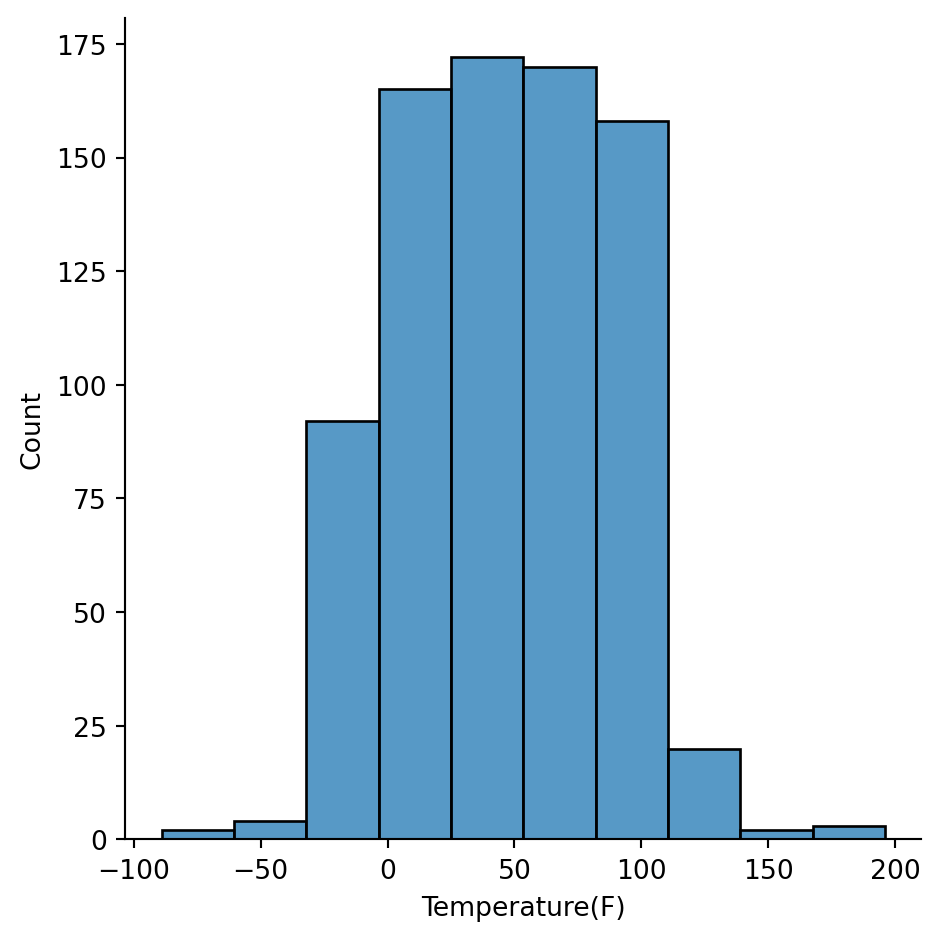

In [25]:
sns.displot(data=temperature,x="Temperature(F)",bins=10)
plt.show()